In [1]:
# Required imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Read in data as .csv file

file_loc = os.getcwd() + "/training_log_SpaceInvaders_rand.csv"
print(file_loc)
log_file = pd.read_csv(filepath_or_buffer= file_loc, header= None, index_col= None, names= ["Epoch", "Score", "Duration"])

np_data = log_file.to_numpy()
np_data = np_data[75:,:]

/Users/patrickowens/Documents/ai_local/group_project/ai/rand/training_log_SpaceInvaders_rand.csv


In [39]:
pd.DataFrame(np_data)

,0,1,2
0,160.0,60.0,3.383002
1,286.0,35.0,5.090557
2,425.0,15.0,2.769395
3,664.0,120.0,4.696558
4,802.0,70.0,2.804673
...,...,...,...
1010,171160.0,200.0,3.658331
1011,171325.0,115.0,3.089632
1012,171486.0,60.0,3.009164
1013,171728.0,145.0,4.823483


In [35]:
#split the data into chunks and get the average of those - looks less noisey

chunks = np.array_split(np_data, 25)
chunked_data = np.zeros((5, len(chunks)))


for i in range(len(chunks)):
    chunked_data[:,i] = np.append(chunks[i][-1,0], np.append(np.mean(chunks[i][:,1:], 0), np.std(chunks[i][:,1:], 0)) )
chunked_data = np.transpose(chunked_data)    

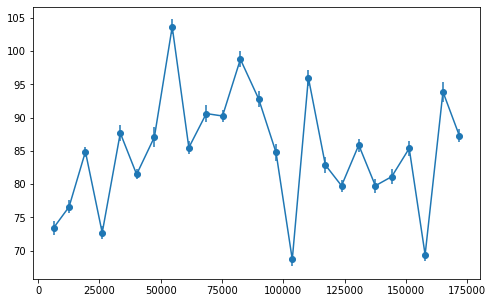

In [47]:
# Plotting the Score

fig, ax = plt.subplots(figsize = (8,5))
ax.errorbar(chunked_data[:,0], chunked_data[:,1], xerr=0, yerr=chunked_data[:,4], fmt='-o')
plt.show()

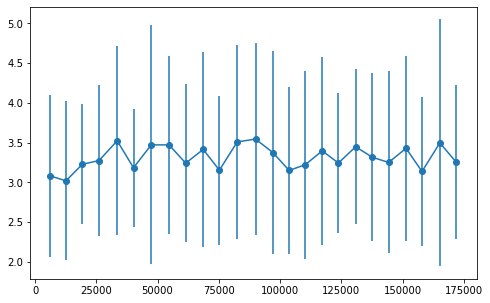

In [42]:
# Plotting the game duration

fig, ax = plt.subplots(figsize = (8,5))
ax.errorbar(chunked_data[:,0], chunked_data[:,2], xerr=0, yerr=chunked_data[:,4], fmt='-o')
plt.show()